In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.svm import SVC

In [4]:
X_train = pd.read_pickle('X_train.pkl')
X_valid = pd.read_pickle('X_valid.pkl')

y_train = pd.read_pickle('y_train.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()

In [8]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,1,29.699118,0,0,30.5000,0,0,1,1,0,0
885,1,25.000000,0,0,7.0500,0,0,1,0,0,1
248,0,24.000000,0,2,14.5000,0,0,1,0,1,0
479,1,22.000000,0,0,7.5208,0,0,1,0,0,1
306,1,0.920000,1,2,151.5500,0,0,1,1,0,0


In [9]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [10]:
X_train[cols_for_scale] = scaler.fit_transform(X_train[cols_for_scale])
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,1,0.367921,0.000,0.000000,0.059532,0,0,1,1,0,0
885,1,0.308872,0.000,0.000000,0.013761,0,0,1,0,0,1
248,0,0.296306,0.000,0.333333,0.028302,0,0,1,0,1,0
479,1,0.271174,0.000,0.000000,0.014680,0,0,1,0,0,1
306,1,0.006283,0.125,0.333333,0.295806,0,0,1,1,0,0


In [11]:
X_valid[cols_for_scale] = scaler.transform(X_valid[cols_for_scale])

In [12]:
X_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.618834,0.376310,0.053812,0.068012,0.063003,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.163162,0.100208,0.139652,0.085059,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,0.005152,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.283740,0.000000,0.000000,0.015412,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.367921,0.000000,0.000000,0.029758,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.447097,0.125000,0.166667,0.061155,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,0.886906,0.500000,0.833333,0.512122,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
X_valid.corr()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
Sex,1.000000,0.089650,-0.224035,-0.235392,-0.201988,-0.078275,-0.157353,0.165501,-0.073590,-0.131292,0.170311
Age,0.089650,1.000000,-0.293713,-0.161685,0.097078,0.114708,0.017259,-0.114195,0.327281,-0.020392,-0.280236
SibSp,-0.224035,-0.293713,1.000000,0.354238,0.137766,0.000599,-0.104008,0.062028,-0.056410,-0.064107,0.101700
Parch,-0.235392,-0.161685,0.354238,1.000000,0.220807,0.027948,-0.033687,-0.005027,-0.013240,-0.021034,0.028598
Fare,-0.201988,0.097078,0.137766,0.220807,1.000000,0.404234,-0.124582,-0.290890,0.628952,-0.128841,-0.467746
Embarked_C,-0.078275,0.114708,0.000599,0.027948,0.404234,1.000000,-0.166181,-0.805040,0.409824,-0.212018,-0.203652
Embarked_Q,-0.157353,0.017259,-0.104008,-0.033687,-0.124582,-0.166181,1.000000,-0.451189,-0.158113,-0.149163,0.260955
Embarked_S,0.165501,-0.114195,0.062028,-0.005027,-0.290890,-0.805040,-0.451189,1.000000,-0.275777,0.281613,0.027321
Pclass_1,-0.073590,0.327281,-0.056410,-0.013240,0.628952,0.409824,-0.158113,-0.275777,1.000000,-0.310091,-0.660585
Pclass_2,-0.131292,-0.020392,-0.064107,-0.021034,-0.128841,-0.212018,-0.149163,0.281613,-0.310091,1.000000,-0.508903


In [17]:
clf = SVC()

In [18]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred = clf.predict(X_valid)

In [21]:
y_pred_train = clf.predict(X_train)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_valid, y_pred)

0.8071748878923767

In [25]:
accuracy_score(y_train, y_pred_train)

0.8158682634730539

In [26]:
c_vals = np.logspace(-2, 5, 29)
c_vals

array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04,
       1.00000000e+05])

In [34]:
accuracy_valid = []
accuracy_train = []
for val in c_vals:
    clf = SVC(C=val)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'C = {val} \n\tacc_valid = {acc_valid} \n\tacc_train = {acc_train}\n')

C = 0.01 
	acc_valid = 0.600896860986547 
	acc_train = 0.6212574850299402

C = 0.01778279410038923 
	acc_valid = 0.600896860986547 
	acc_train = 0.6212574850299402

C = 0.03162277660168379 
	acc_valid = 0.7802690582959642 
	acc_train = 0.7889221556886228

C = 0.05623413251903491 
	acc_valid = 0.8116591928251121 
	acc_train = 0.8083832335329342

C = 0.1 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006

C = 0.1778279410038923 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006

C = 0.31622776601683794 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006

C = 0.5623413251903491 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006

C = 1.0 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8158682634730539

C = 1.7782794100389228 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8158682634730539

C = 3.1622776601683795 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8158682634730539

C = 5.623413251903491 
	acc_valid = 0.8161434977578476 


In [35]:
np.max(accuracy_valid), np.max(accuracy_train)

(0.8251121076233184, 0.8922155688622755)

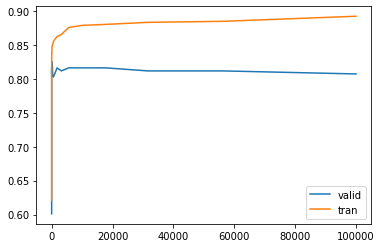

In [38]:
plt.plot(c_vals, accuracy_valid)
plt.plot(c_vals, accuracy_train)
plt.legend(['valid', 'tran'])

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)